<h1> Density of states - Ly=Lz=50 , Lsc=Lnc=25

<h5> First, solve system and plot correlation function and check if system has ok convergence

In [1]:
import sys
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

sys.path.append("/Users/martinedh/Documents/NTNU/GitHub/FysMat/Prosjektoppgave")
from main import solve_and_return_system_and_F_matrix
from main import define_system, solve_and_test_small_system, solve_for_sns_system
from plots import plot_pairing_amplitude, plot_density_of_states

from solve_hamiltonian import solve_system

In [72]:
from plots import plot_complex_function
def plot_new_f(F_matrix,label_F_matrix, system):
    fig = plt.figure(figsize=(25, 8))
    ax = fig.subplots(ncols=3, nrows=(F_matrix.shape[-1] + 2) // 3, sharex=True, sharey=False).flatten()
    for i in range(F_matrix.shape[-1]):
        ys = F_matrix[:, i]
        # ys[np.abs(ys)< tol] = 0.0 + 0.0j
        plot_complex_function(y=ys, ax=ax[i], labels=['Real part', 'Imaginary part'])
        ax[i].grid()
        ax[i].legend()
        ax[i].set_title(label_F_matrix[i])
        ax[i].set_xlabel("Lattice i")
    fig.suptitle("Correlation function: SC - SOC -  SC")
    fig.subplots_adjust(wspace=0.0)
    plt.show()
    #fig.savefig('correlation function, mu_s=0.9, mu_soc=0.85, u=-4.2.png', bbox_inches='tight')

    fig = plt.figure(figsize=(20, 6))
    fig.subplots_adjust(wspace=0.0)
    
    system.plot_components_of_hamiltonian(fig)

In [62]:
# record runtime
import timeit
start = timeit.default_timer()

system_0_0_0, F_matrix_0_0_0 = solve_and_test_small_system(alpha_array_init=np.array([0.0,0.0,0.0]), max_num_iter = 0, phase=np.pi/2)
system_1_0_0, F_matrix_1_0_0 = solve_and_test_small_system(alpha_array_init=np.array([1.0,0.0,0.0]), max_num_iter = 0, phase=np.pi/2)
system_0_1_0, F_matrix_0_1_0 = solve_and_test_small_system(alpha_array_init=np.array([0.0,1.0,0.0]), max_num_iter = 0, phase=np.pi/2)
system_0_0_1, F_matrix_0_0_1 = solve_and_test_small_system(alpha_array_init=np.array([0.0,0.0,1.0]), max_num_iter = 0, phase=np.pi/2)
system_0_5_5, F_matrix_0_5_5 = solve_and_test_small_system(alpha_array_init=np.array([1.0,np.sqrt(0.5),np.sqrt(0.5)]), max_num_iter = 0, phase=np.pi/2)

# nc_25, sc=25, ly=lz=50, u=-1
#system = System(phase=0, L_y = 50,L_z=50, L_sc_0 = 0, L_nc=25, L_sc=25, L_soc=0, mu_sc = 0.9, mu_nc = 0.9, mu_soc = 0.85, u_sc = -4.2, beta=100)

# print runtime
stop = timeit.default_timer()
print('Time: ', stop - start) 

num iteration is  1
num iteration is  1
num iteration is  1
num iteration is  1
num iteration is  1
Time:  9.681961752008647


n=[0.0,0.0,0.0]


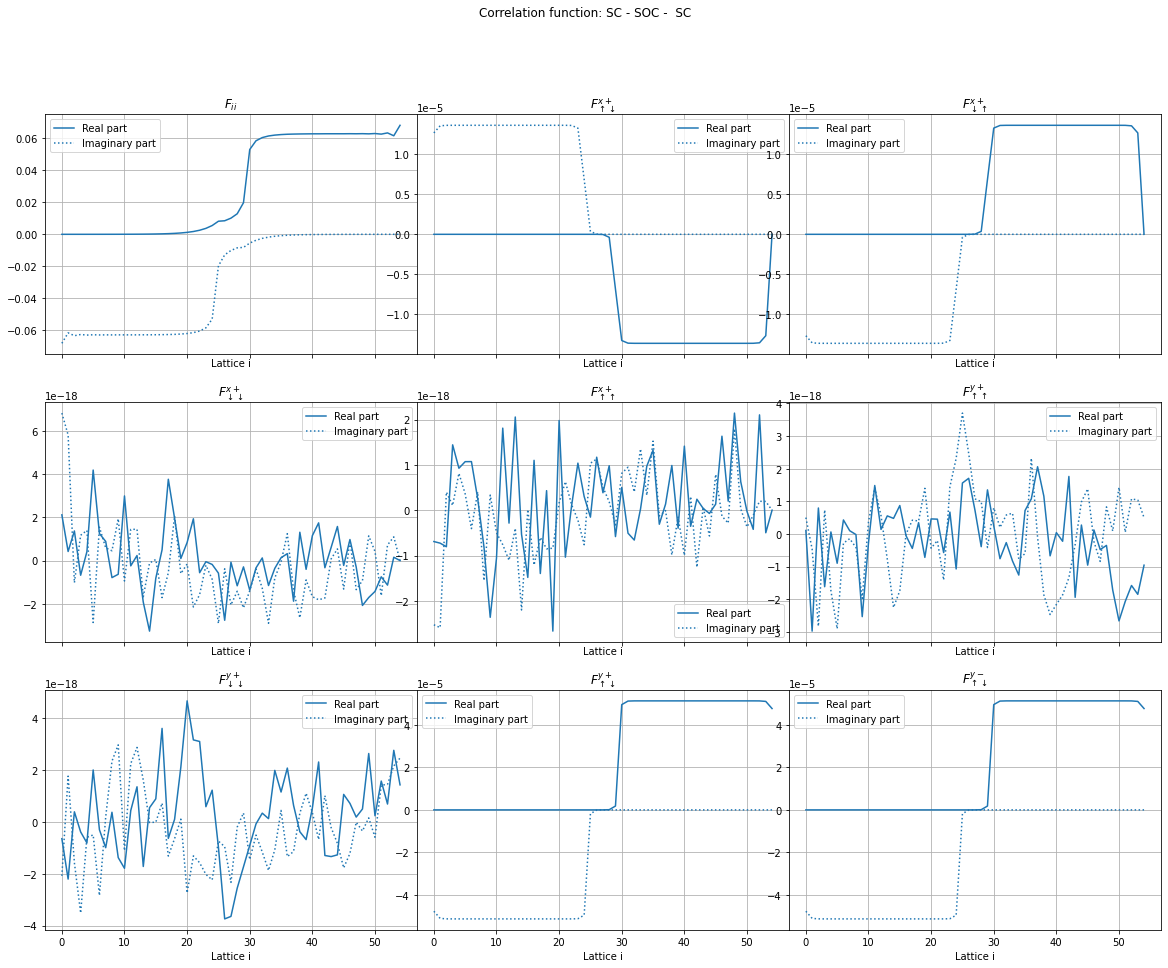

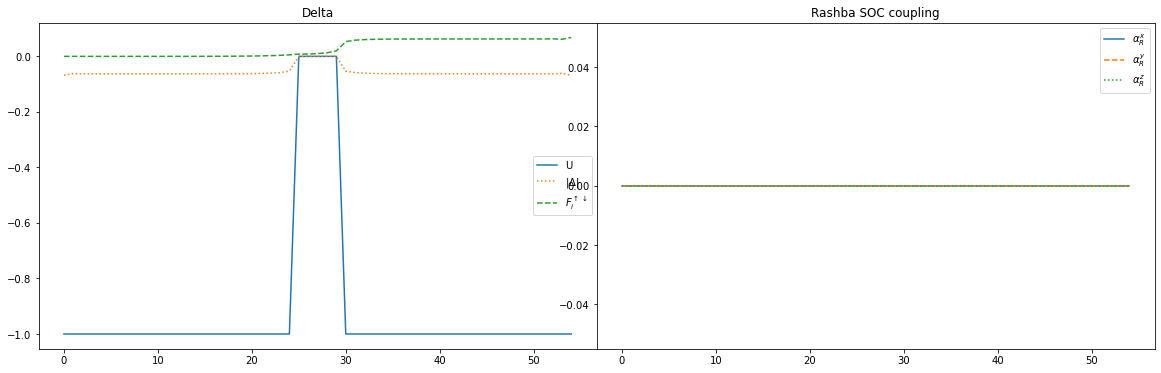

In [65]:
print('n=[0.0,0.0,0.0]')
plot_pairing_amplitude(system_0_0_0, F_matrix_0_0_0) 

n=[1.0,0.0,0.0]


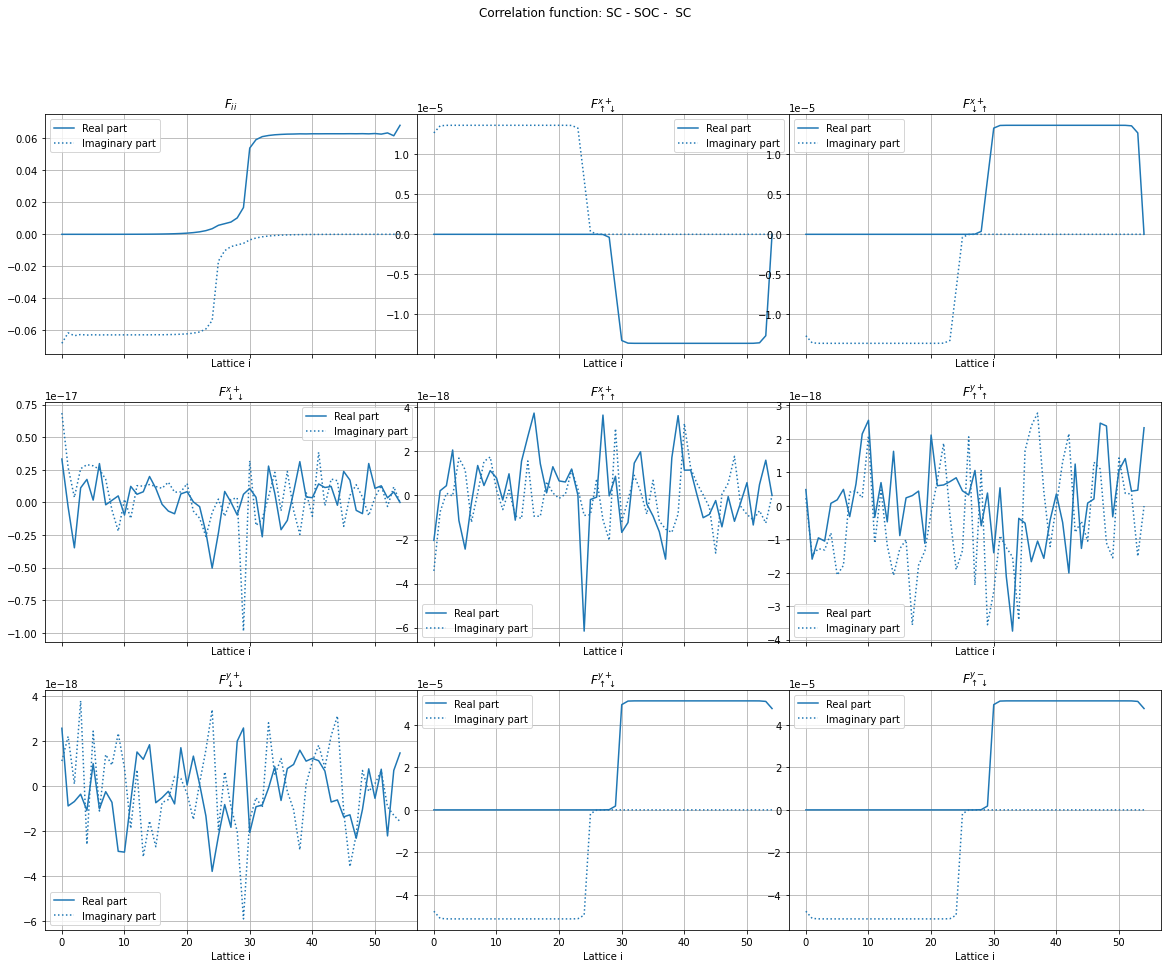

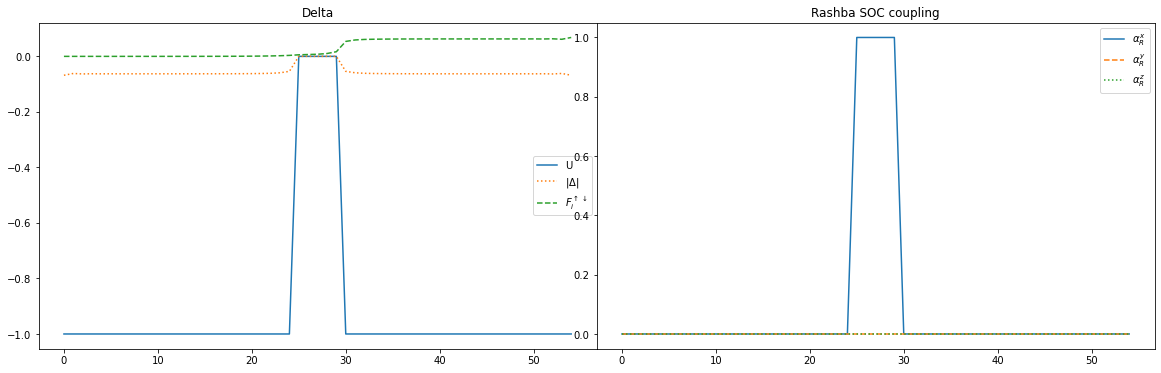

In [66]:
print('n=[1.0,0.0,0.0]')
plot_pairing_amplitude(system_1_0_0, F_matrix_1_0_0) 

n=[1.0,0.0,0.0]


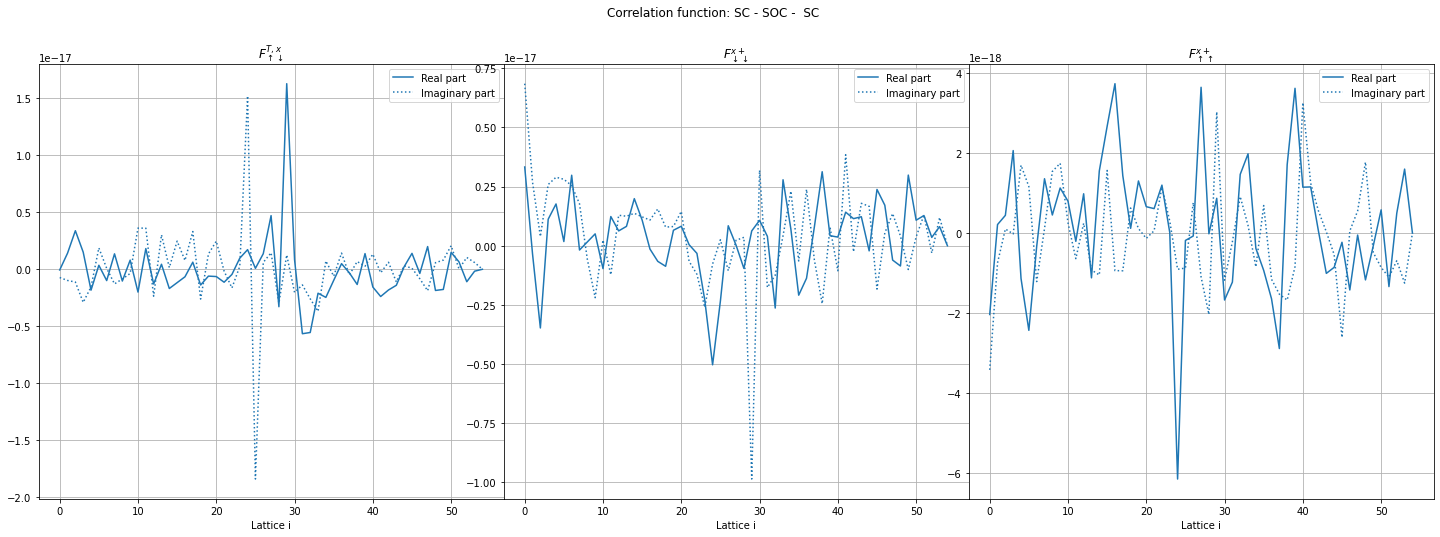

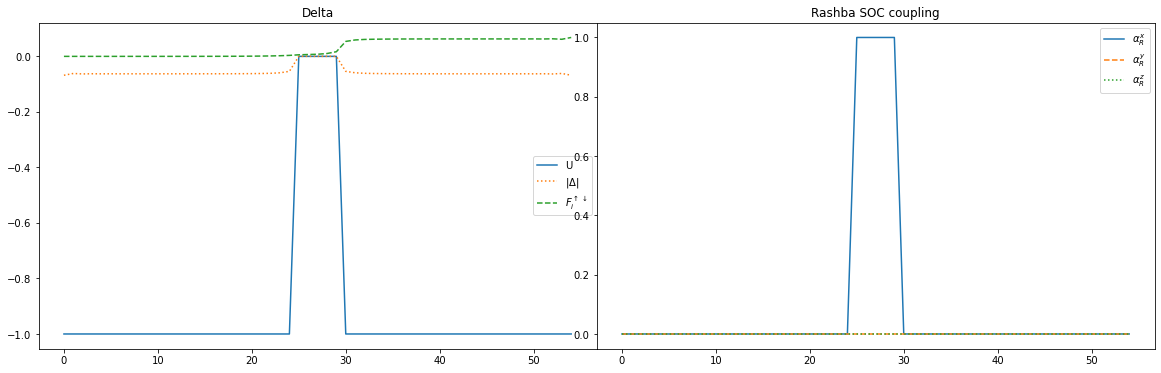

In [73]:
f_ud_du=np.zeros((system.L_x,3), dtype=np.complex128)
f_ud_du[:,0] = 1/2*(F_matrix_1_0_0[:,1]+F_matrix_1_0_0[:,2])#*np.exp(1.0j*(-np.pi/2))
f_ud_du[:,1] = F_matrix_1_0_0[:,3]
f_ud_du[:,2] = F_matrix_1_0_0[:,4]
print('n=[1.0,0.0,0.0]')
plot_new_f(f_ud_du,[r'$F_{\uparrow\downarrow}^{T, x}$',r'$F_{\downarrow\downarrow}^{x+}$',
    r'$F_{\uparrow\uparrow}^{x+}$',], system_1_0_0)

n=[0.0,1.0,0.0]


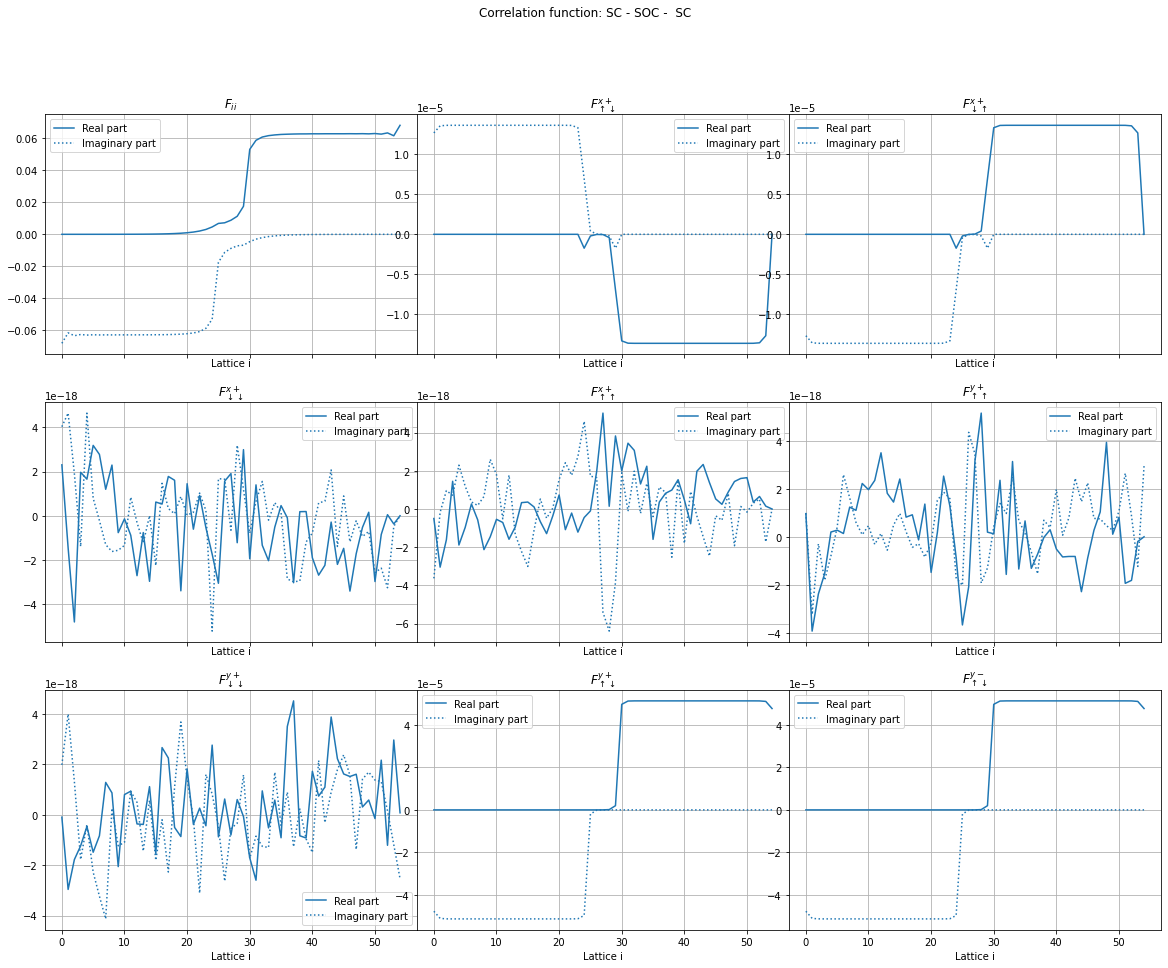

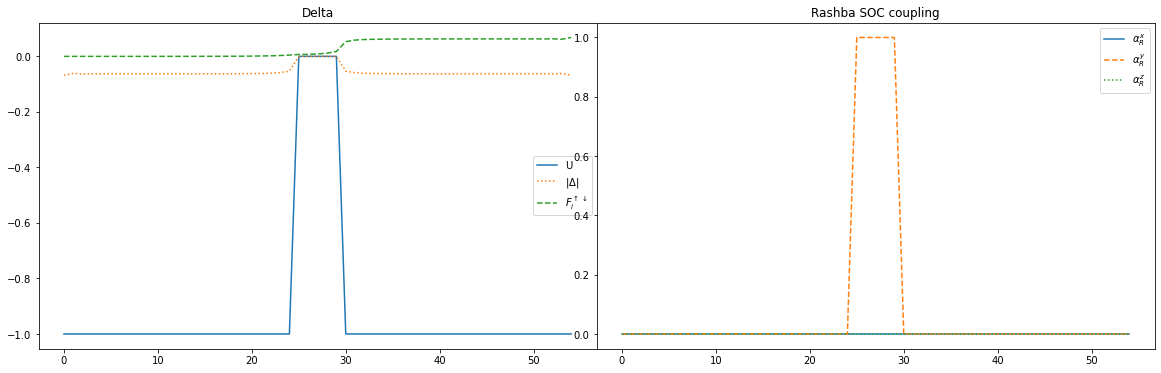

In [68]:
print('n=[0.0,1.0,0.0]')
plot_pairing_amplitude(system_0_1_0, F_matrix_0_1_0) 

n=[0.0,1.0,0.0]


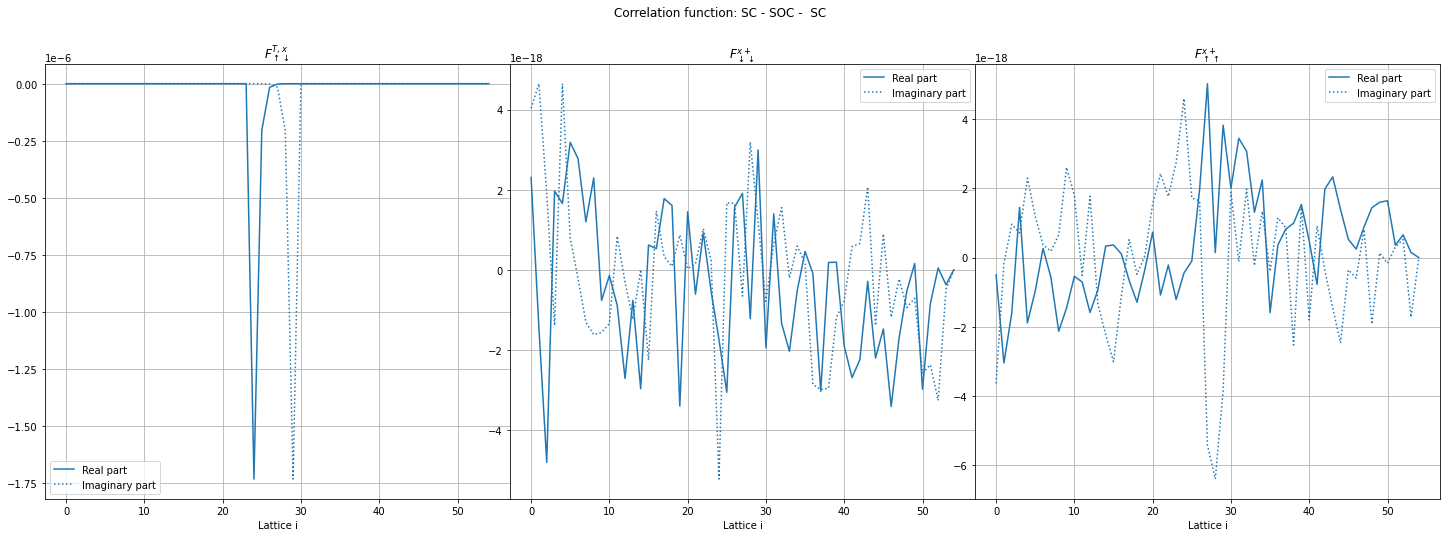

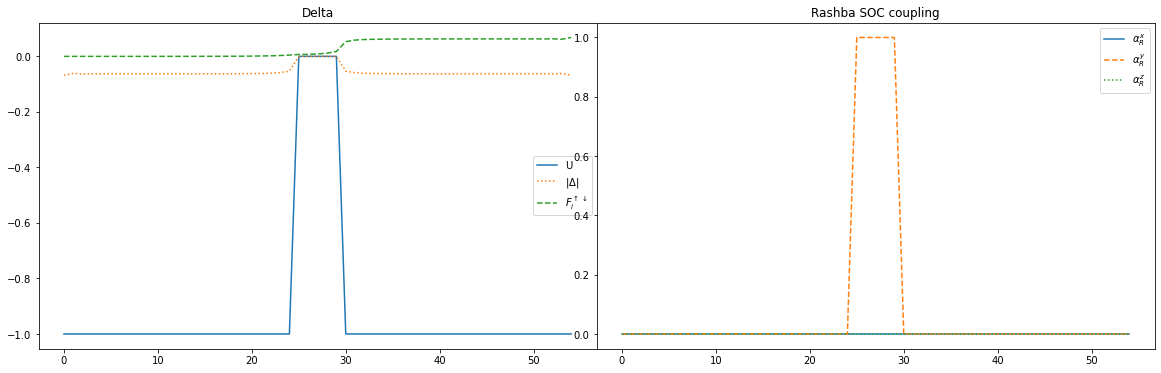

In [74]:
f_ud_du=np.zeros((system.L_x,3), dtype=np.complex128)
f_ud_du[:,0] = 1/2*(F_matrix_0_1_0[:,1]+F_matrix_0_1_0[:,2])#*np.exp(1.0j*(-np.pi/2))
f_ud_du[:,1] = F_matrix_0_1_0[:,3]
f_ud_du[:,2] = F_matrix_0_1_0[:,4]
print('n=[0.0,1.0,0.0]')
plot_new_f(f_ud_du,[r'$F_{\uparrow\downarrow}^{T, x}$',r'$F_{\downarrow\downarrow}^{x+}$',
    r'$F_{\uparrow\uparrow}^{x+}$',], system_0_1_0)

n=[0.0,0.0,1.0]


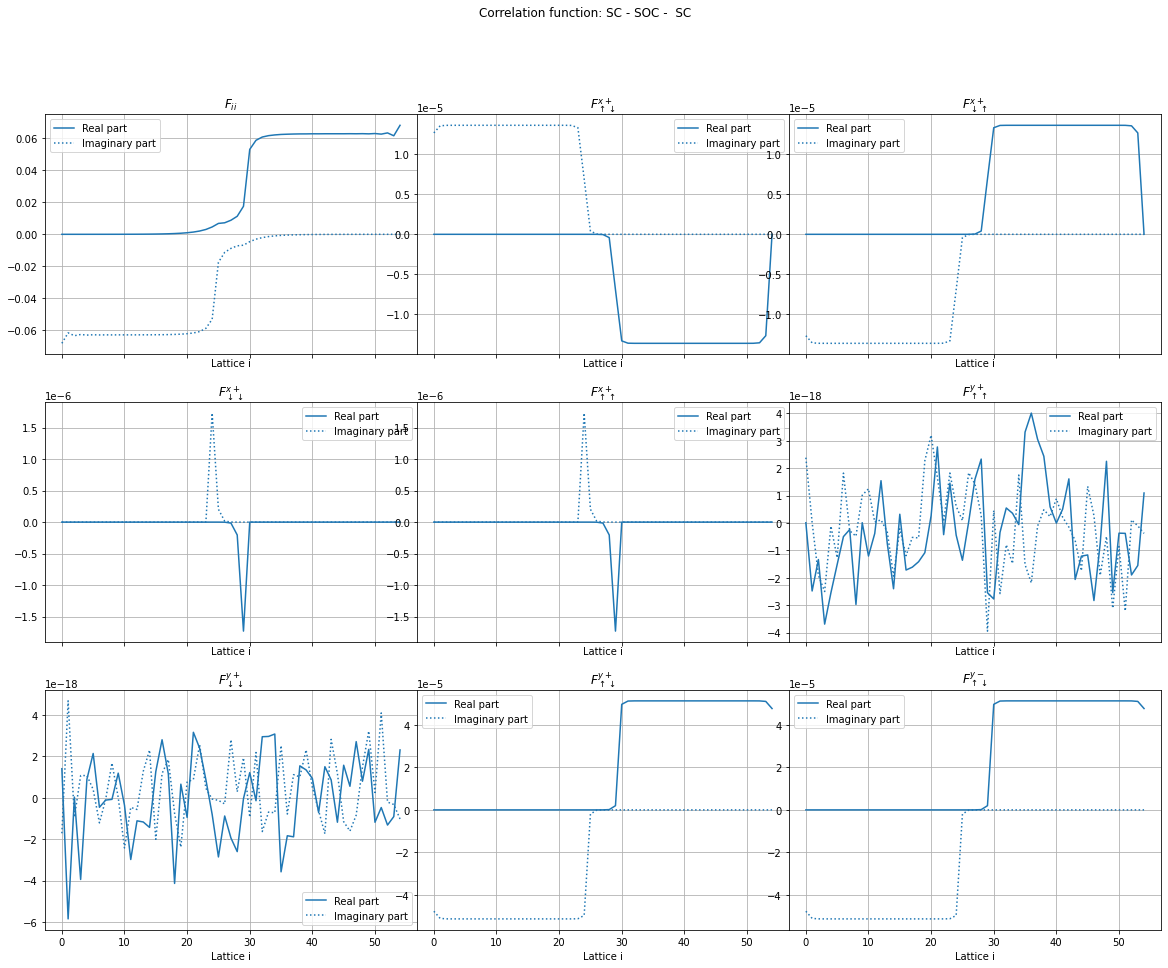

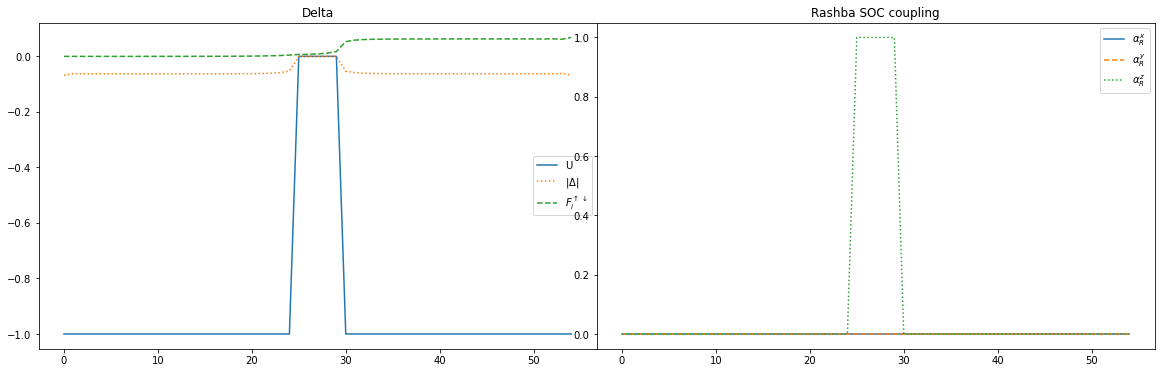

In [70]:
print('n=[0.0,0.0,1.0]')
plot_pairing_amplitude(system_0_0_1, F_matrix_0_0_1) 

n=[0.0,0.0,1.0]


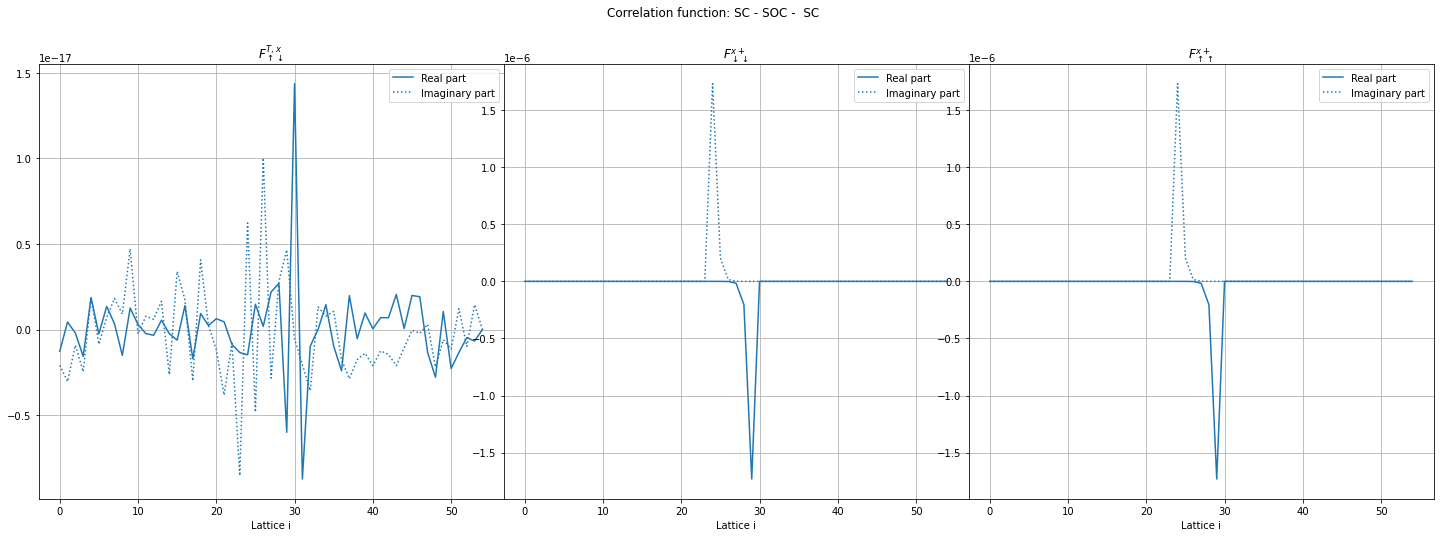

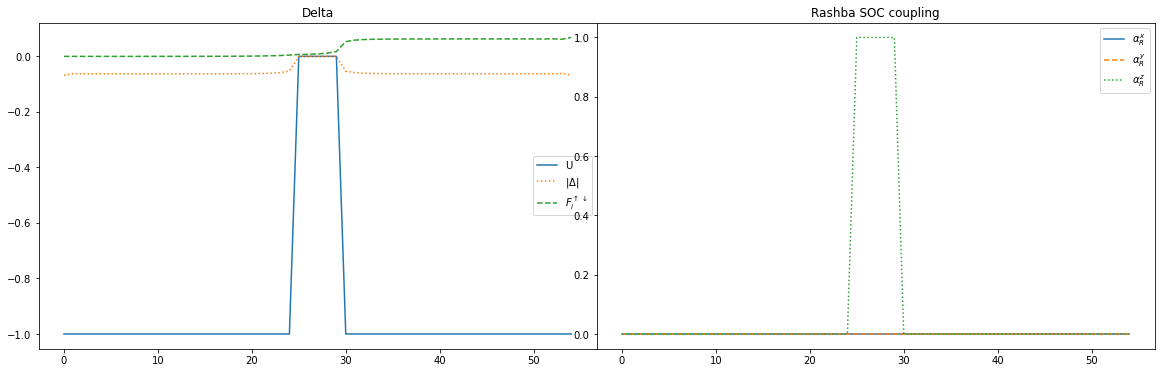

In [75]:
f_ud_du=np.zeros((system.L_x,3), dtype=np.complex128)
f_ud_du[:,0] = 1/2*(F_matrix_0_0_1[:,1]+F_matrix_0_0_1[:,2])#*np.exp(1.0j*(-np.pi/2))
f_ud_du[:,1] = F_matrix_0_0_1[:,3]
f_ud_du[:,2] = F_matrix_0_0_1[:,4]
print('n=[0.0,0.0,1.0]')
plot_new_f(f_ud_du,[r'$F_{\uparrow\downarrow}^{T, x}$',r'$F_{\downarrow\downarrow}^{x+}$',
    r'$F_{\uparrow\uparrow}^{x+}$',], system_0_0_1)

n=[0.0,sqrt(0.5),sqrt(0.5)]


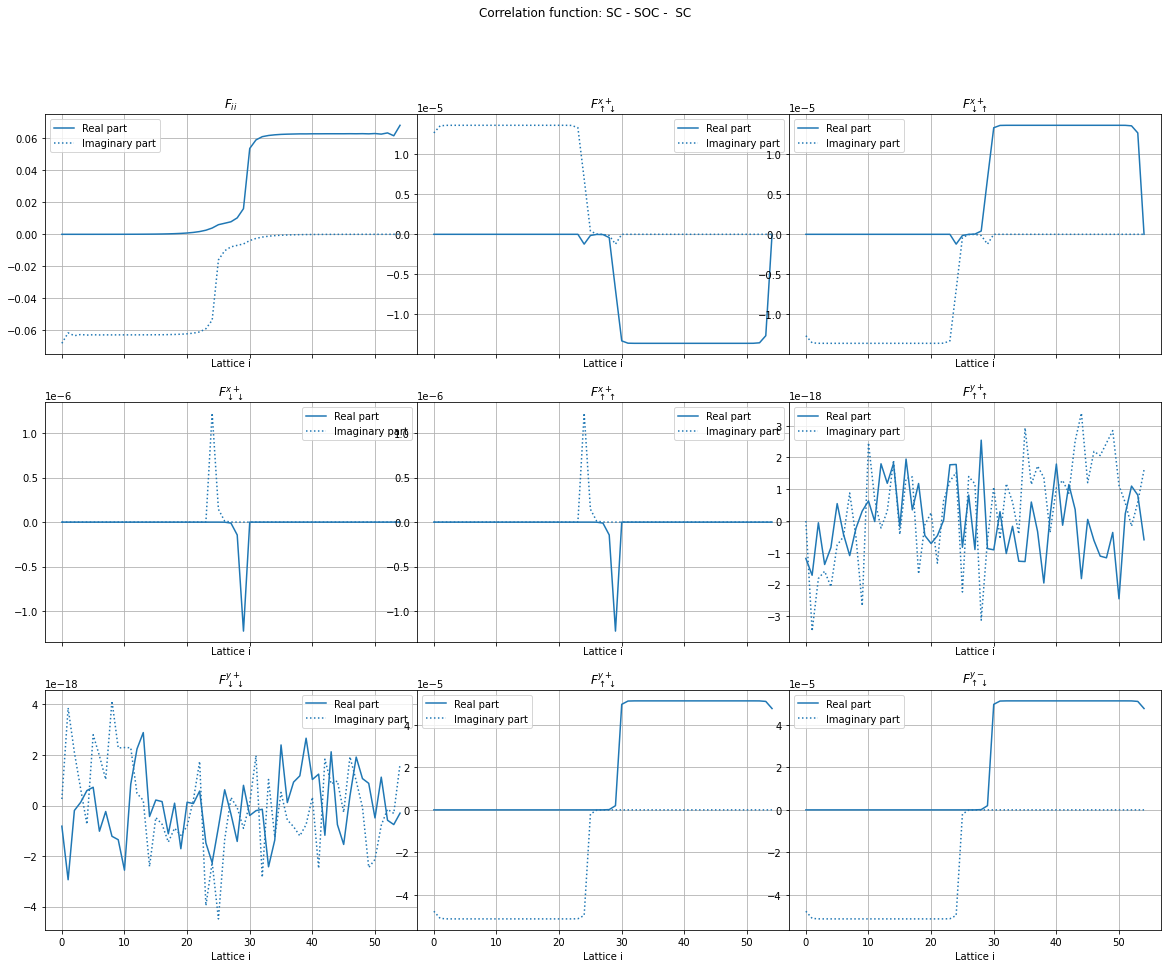

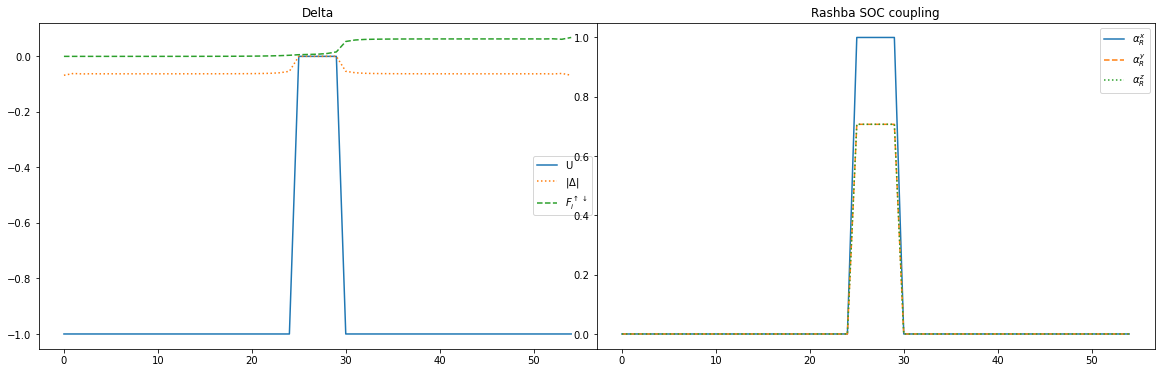

In [76]:
print('n=[0.0,sqrt(0.5),sqrt(0.5)]')
plot_pairing_amplitude(system_0_5_5, F_matrix_0_5_5) 

n=[0.0,sqrt(0.5),sqrt(0.5)]


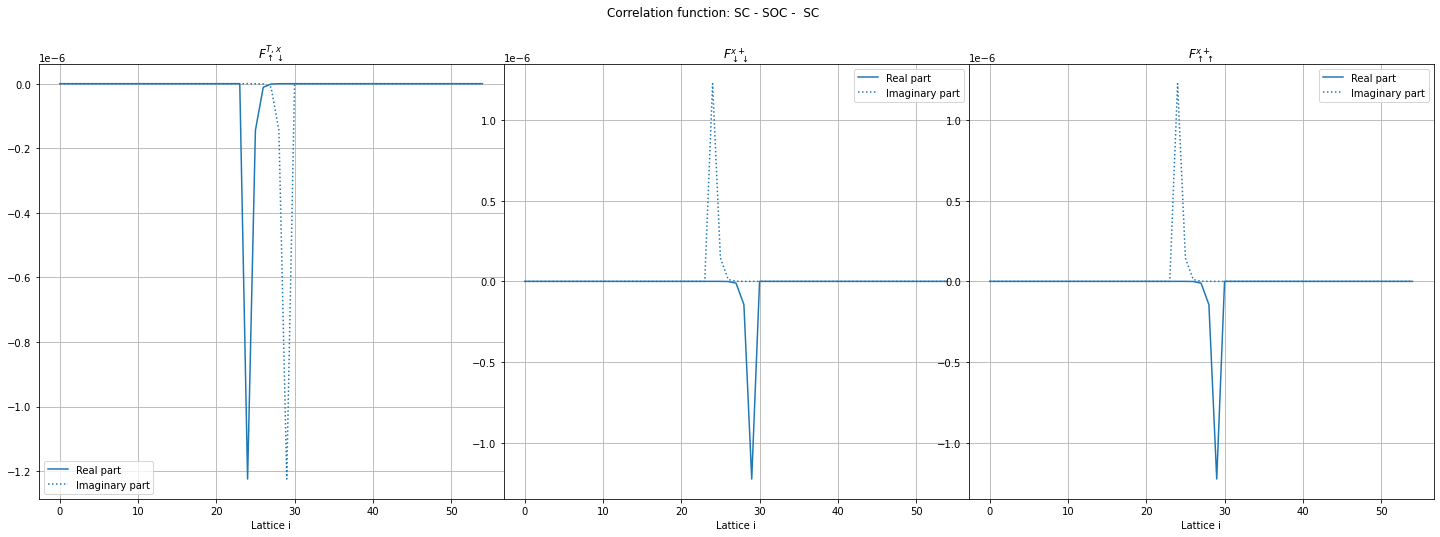

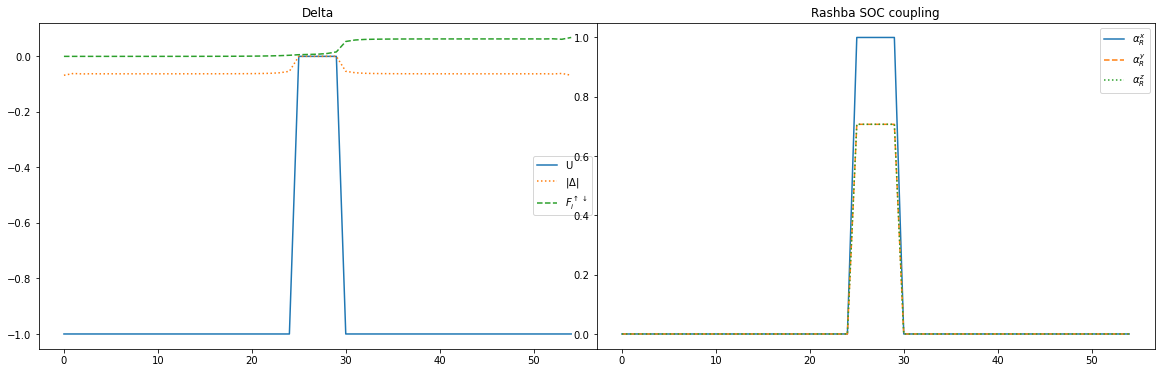

In [78]:
f_ud_du=np.zeros((system.L_x,3), dtype=np.complex128)
f_ud_du[:,0] = 1/2*(F_matrix_0_5_5[:,1]+F_matrix_0_5_5[:,2])#*np.exp(1.0j*(-np.pi/2))
f_ud_du[:,1] = F_matrix_0_5_5[:,3]
f_ud_du[:,2] = F_matrix_0_5_5[:,4]
print('n=[0.0,sqrt(0.5),sqrt(0.5)]')
plot_new_f(f_ud_du,[r'$F_{\uparrow\downarrow}^{T, x}$',r'$F_{\downarrow\downarrow}^{x+}$',
    r'$F_{\uparrow\uparrow}^{x+}$',], system_0_5_5)

In [5]:
from system_helper import calculate_F_matrix
fmatrix=calculate_F_matrix(L_x=system.L_x,
                                     L_y=system.L_y,
                                     L_z=system.L_z,
                                     eigenvalues=system.eigenvalues,
                                     eigenvectors=system.eigenvectors,
                                     beta=system.beta,
                                     ky_array=system.ky_array,
                                     kz_array=system.kz_array)

(220,)
(220,)


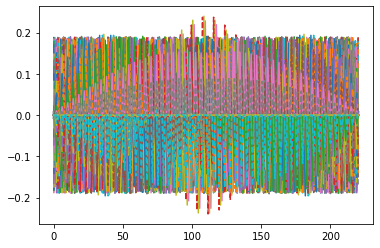

In [16]:

x_tmp = np.linspace(0,4*system.L_x, system.eigenvectors.shape[0])
print(system.eigenvectors[:,0,0,0].shape)
print(x_tmp.shape)
for i in range(system.eigenvectors.shape[1]):
    plt.plot(x_tmp, np.real(system.eigenvectors[:,i, 0, 0]))
    plt.plot(x_tmp, np.imag(system.eigenvectors[:,i, 0, 0]), '--')
plt.show()

<h3> Now, calculate DOS and plot for each medium

In [33]:
from system_helper import local_density_of_states

In [34]:
%%time

# record runtime
import timeit
start = timeit.default_timer()

#ldos, energy_state = local_density_of_states(0.1, 0.1, -6, 6, system.L_y, system.L_z, system.eigenvalues, system.eigenvectors)
ldos, energy_state = system.ldos_from_problem(0.1, 0.15, -6, 6) # resolution, sigma, min e, max e #0.01, 0.03, -6, 6

# print runtime
stop = timeit.default_timer()
print('Time: ', stop - start) 

Time:  3.8445515260100365
CPU times: user 3.66 s, sys: 45.4 ms, total: 3.7 s
Wall time: 3.85 s


In [35]:
print(ldos.shape)
print(energy_state.shape)

(55, 120)
(120,)


(120,)
(55, 120)


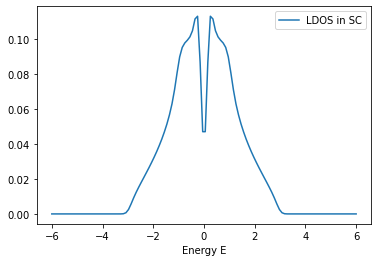

/Users/martinedh/Documents/NTNU/GitHub/FysMat/Prosjektoppgave/plots.py:70: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(es, np.sum(ldos[L_sc_0:L_sc_0 + L_nc], axis=0)/L_nc, label='LDOS in NC')


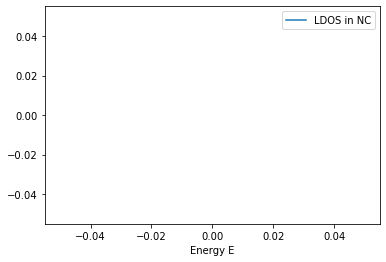

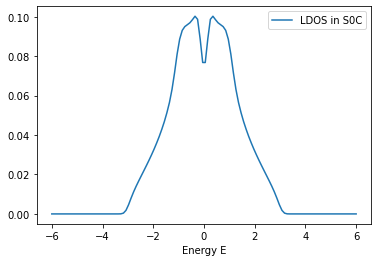

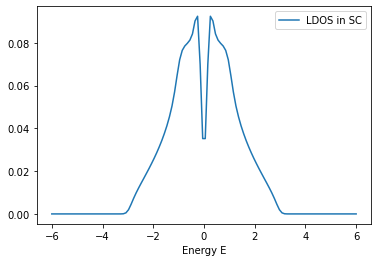

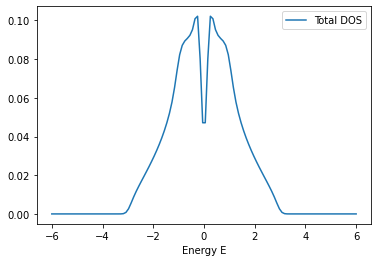

In [36]:
plot_density_of_states(energy_state, ldos, L_sc_0 = 25, L_nc=0, L_sc=25, L_soc=10)

Text(0, 0.5, '#')

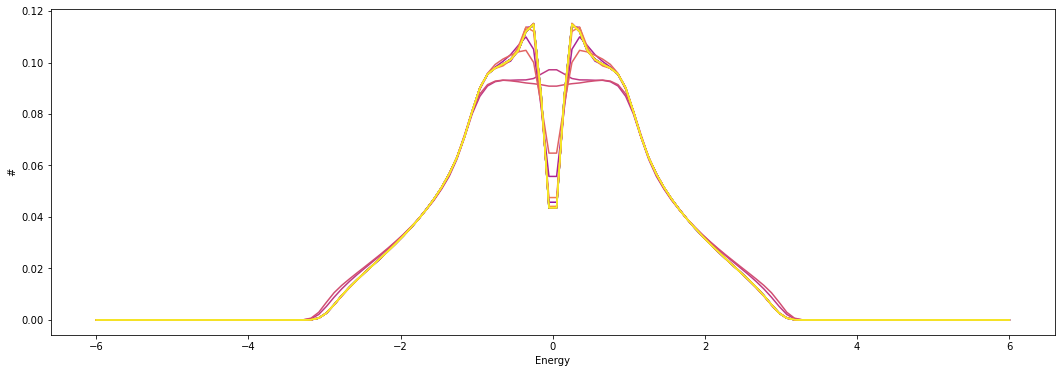

In [37]:
# plot all ldos for each medium

fig, ax = plt.subplots(figsize=(18, 6))
num_latticesites = ldos.shape[0]
step = 3
delta_range = 20
start = max(num_latticesites//2-delta_range, 0)
stop = min(num_latticesites//2+delta_range, num_latticesites)
#stop = Nx//2
for i in range(start, stop, step):
    ax.plot(energy_state, ldos[i, :], c = cm.plasma(float(i-start)/(stop-start)))
#ax.set_xlim()
ax.set_xlabel("Energy")
ax.set_ylabel("#")

Text(0, 0.5, 'Energy')

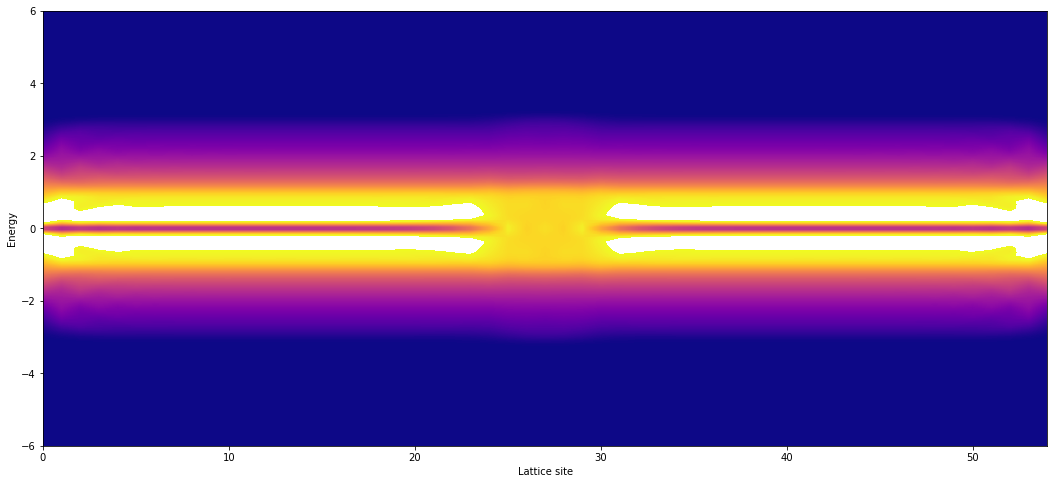

In [46]:
fig, ax = plt.subplots(figsize=(18, 8))
ax.contourf(np.arange(ldos.shape[0]), energy_state, ldos.T, cmap=cm.plasma, levels=np.linspace(0, 0.1, 500))
ax.set_xlabel("Lattice site")
ax.set_ylabel("Energy")

Text(0, 0.5, '#')

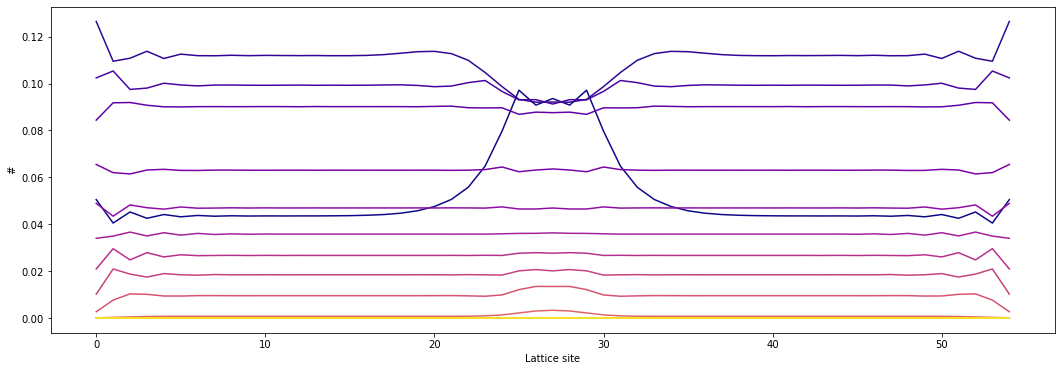

In [39]:
# Try to plot only middle energies
# Hva plottes egentlig?

fig = plt.figure(figsize=(18, 6))
num_energies = ldos.shape[1]
step = 3
delta_range = 50
start = num_energies//2
stop = min(num_energies//2+delta_range, num_energies)
for i in range(start, stop, step):
    plt.plot(ldos[:, i], c = cm.plasma(float(i-start)/(stop-start)))
plt.xlabel("Lattice site")
plt.ylabel("#")